# Validations

### Common Imports

In [8]:
import sys
import os

root_path = os.path.dirname(os.getcwd())
src_path = os.path.join(root_path, "src")
sys.path.insert(0, src_path)

%load_ext autoreload
%autoreload 2

# Evaluate the embeddings

In [19]:
import torch
batch_size, latent_dim = 500, 128

all_features_dict = {
    "feature_fake" : torch.randn(batch_size, latent_dim),
    "regress_moran" : torch.randn(batch_size),
    "classify" : torch.randint(low=0, high=5, size=[batch_size]).tolist(),
    "tissue" : torch.randint(low=0, high=5, size=[batch_size]).tolist()
}

In [20]:
feature_keys, regress_keys, classify_keys = [], [], []
for key in all_features_dict.keys():
    if key.startswith("feature"):
        feature_keys.append(key)
    elif key.startswith("regress"):
        regress_keys.append(key)
    elif key.startswith("classify"):
        classify_keys.append(key)

print(feature_keys)
print(regress_keys)
print(classify_keys)

['feature_fake']
['regress_moran']
['classify']


In [32]:
a = torch.randint(10, (5,))
b = a + (torch.randn(50, 1) * 5).long().clamp(min=0)
print(torch.bincount(b[:, 0]))
print(torch.bincount(b[:, 1]))
print(torch.bincount(b[:, 2]))
print(torch.bincount(b[:, 3]))
print(torch.bincount(b[:, 4]))
torch.mode(b, 0)

tensor([ 0,  0,  0,  0, 31,  4,  1,  2,  1,  5,  1,  2,  0,  2,  0,  1])
tensor([ 0,  0,  0,  0, 31,  4,  1,  2,  1,  5,  1,  2,  0,  2,  0,  1])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  4,  1,  2,  1,  5,  1,  2,  0,
         2,  0,  1])
tensor([ 0,  0,  0,  0,  0,  0, 31,  4,  1,  2,  1,  5,  1,  2,  0,  2,  0,  1])
tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0, 31,  4,  1,  2,  1,  5,  1,  2,  0,
         2,  0,  1])


torch.return_types.mode(
values=tensor([4, 4, 9, 6, 9]),
indices=tensor([33, 33, 33, 33, 33]))

In [24]:
from tissue_purifier.model_utils.classify_regress import (
    classify_and_regress, 
    PlRegressor, 
    PlClassifier,  
    KNeighborsClassifier, 
    KNeighborsRegressor)

mlp_kargs = {
    "hidden_layer_sizes" : [],
    "solver": 'adam',
    "alpha" : 0.0001,
    "batch_size" : 'auto',
    "learning_rate" : 'constant',
    "learning_rate_init" : 0.0003,
    "max_iter" : 50000,
    "shuffle" : True,
    "random_state" : 1,
    "tol" : 1E-6,
    "verbose" : False,
    "n_iter_no_change" : 10,
    "early_stopping" :False,
}


kn_kargs = {
    "n_neighbors": 5,
}

#result_dict_mlp = classify_and_regress(
#    input_dict=all_features_dict, 
#    feature_keys=feature_keys, 
#    regress_keys=regress_keys,
#    classify_keys=classify_keys,
#    regressor=MLPRegressor(**mlp_kargs),
#    classifier=MLPClassifier(**mlp_kargs),
#    add_prediction=False, 
#    verbose=True)

result_dict_kn = classify_and_regress(
    input_dict=all_features_dict, 
    feature_keys=feature_keys, 
    regress_keys=regress_keys,
    classify_keys=classify_keys,
    regressor=KNeighborsRegressor(**kn_kargs),
    classifier=KNeighborsClassifier(**kn_kargs),
    iou_threshold=0.5,
    tissue_key='tissue',
    patches_xywh_key='patch_xywh',
    add_prediction=False, 
    verbose=True)

AssertionError: Patches_xywh_key = patch_xywh is not present in input dictionary.

In [14]:
result_dict_kn

{'feature_fake': {'classify_accuracy_test': 0.2,
  'classify_accuracy_train': 0.5425,
  'regress_moran_r2_test': -0.2305165949728618,
  'regress_moran_r2_train': 0.21627907412764258}}

In [57]:
result_dict_kn

{'feature_vae': {'classify_tissue_label_accuracy_test': 0.25,
  'classify_tissue_label_accuracy_train': 0.5041666666666667,
  'classify_condition_accuracy_test': 0.53,
  'classify_condition_accuracy_train': 0.71625,
  'regress_moran_r2_test': -0.028646665293065254,
  'regress_moran_r2_train': 0.3049986830592607},
 'feature_dino': {'classify_tissue_label_accuracy_test': 0.30666666666666664,
  'classify_tissue_label_accuracy_train': 0.5604166666666667,
  'classify_condition_accuracy_test': 0.5433333333333333,
  'classify_condition_accuracy_train': 0.7475,
  'regress_moran_r2_test': 0.2512770816868789,
  'regress_moran_r2_train': 0.4835245559272132},
 'feature_composition': {'classify_tissue_label_accuracy_test': 0.5083333333333333,
  'classify_tissue_label_accuracy_train': 0.715,
  'classify_condition_accuracy_test': 0.7266666666666667,
  'classify_condition_accuracy_train': 0.8225,
  'regress_moran_r2_test': 0.21808701350175141,
  'regress_moran_r2_train': 0.5258288020494915}}

In [58]:
result_dict_mlp

{'feature_vae': {'classify_tissue_label_accuracy_test': 0.4766666666666667,
  'classify_tissue_label_accuracy_train': 0.8,
  'classify_condition_accuracy_test': 0.6333333333333333,
  'classify_condition_accuracy_train': 0.75375,
  'regress_moran_r2_test': 0.2219732763826625,
  'regress_moran_r2_train': 0.47977656156757964},
 'feature_dino': {'classify_tissue_label_accuracy_test': 0.18333333333333332,
  'classify_tissue_label_accuracy_train': 0.20125,
  'classify_condition_accuracy_test': 0.48333333333333334,
  'classify_condition_accuracy_train': 0.51875,
  'regress_moran_r2_test': 0.21346775857812939,
  'regress_moran_r2_train': 0.21407430996952503},
 'feature_composition': {'classify_tissue_label_accuracy_test': 0.5783333333333334,
  'classify_tissue_label_accuracy_train': 0.5725,
  'classify_condition_accuracy_test': 0.69,
  'classify_condition_accuracy_train': 0.6641666666666667,
  'regress_moran_r2_test': 0.22715731268771777,
  'regress_moran_r2_train': 0.19737322985093242}}

In [56]:
print("ciao")

ciao


In [24]:
result_dict_kn

{'features_teacher_bbone': {'classify_tissue_label_accuracy_test': 0.9383333333333334,
  'classify_tissue_label_accuracy_train': 0.9708333333333333,
  'classify_condition_accuracy_test': 0.9583333333333334,
  'classify_condition_accuracy_train': 0.9879166666666667,
  'regress_moran_r2_test': 0.8763070972006142,
  'regress_moran_r2_train': 0.9152835370328142},
 'features_composition': {'classify_tissue_label_accuracy_test': 0.7866666666666666,
  'classify_tissue_label_accuracy_train': 0.8645833333333334,
  'classify_condition_accuracy_test': 0.875,
  'classify_condition_accuracy_train': 0.915,
  'regress_moran_r2_test': 0.6133730545831113,
  'regress_moran_r2_train': 0.710666576001998}}

In [28]:
exp["regress_and_classify_kn"] = result_dict_kn

In [29]:
#for kf, kf_dict in result_dict_kn.items():
#    for k, metric in kf_dict.items():
#        exp["regress"].log
#        #exp["regress_and_classify/kn/"+kf+"/"+k].log(metric)

In [25]:
#result_dict_mlp

In [ ]:
#for kf, kf_dict in result_dict_mlp.items():
#    for k, metric in kf_dict.items():
#        exp["regress_and_classify/mlp/"+kf+"/"+k].log(metric)
#    

In [64]:
from tissue_purifier.plot_utils.plot_misc import plot_bars

result_dict = result_dict_kn

keys_metric = set()
for kf, d_tmp in result_dict.items(): 
    for key in d_tmp.keys():
        if key.endswith("accuracy_test") or key.endswith("r2_test"):
            keys_metric.add(key)
            
print(keys_metric)

def compare_features_according_to_metric(dict_result, key_metric):
    x_labels = []
    metric_values = []
    for kf, kf_dict in dict_result.items():
        if key_metric in kf_dict.keys():
            x_labels.append(kf)
            metric_values.append(kf_dict[key_metric])
    return x_labels, metric_values

figs = []
for key_metric in keys_metric:
    x_labels, y_values = compare_features_according_to_metric(result_dict, key_metric)
    fig = plot_bars(y_values, x_labels=x_labels, title=key_metric)
    figs.append(fig)
    exp["feature_comparison"].log(neptune.types.File.as_image(fig))

{'regress_moran_r2_test', 'classify_tissue_label_accuracy_test', 'classify_condition_accuracy_test'}


In [65]:
result_dict_kn

{'features_teacher_bbone': {'classify_tissue_label_accuracy_test': 0.9383333333333334,
  'classify_tissue_label_accuracy_train': 0.9708333333333333,
  'classify_condition_accuracy_test': 0.9583333333333334,
  'classify_condition_accuracy_train': 0.9879166666666667,
  'regress_moran_r2_test': 0.8763070972006142,
  'regress_moran_r2_train': 0.9152835370328142},
 'features_composition': {'classify_tissue_label_accuracy_test': 0.7866666666666666,
  'classify_tissue_label_accuracy_train': 0.8645833333333334,
  'classify_condition_accuracy_test': 0.875,
  'classify_condition_accuracy_train': 0.915,
  'regress_moran_r2_test': 0.6133730545831113,
  'regress_moran_r2_train': 0.710666576001998}}

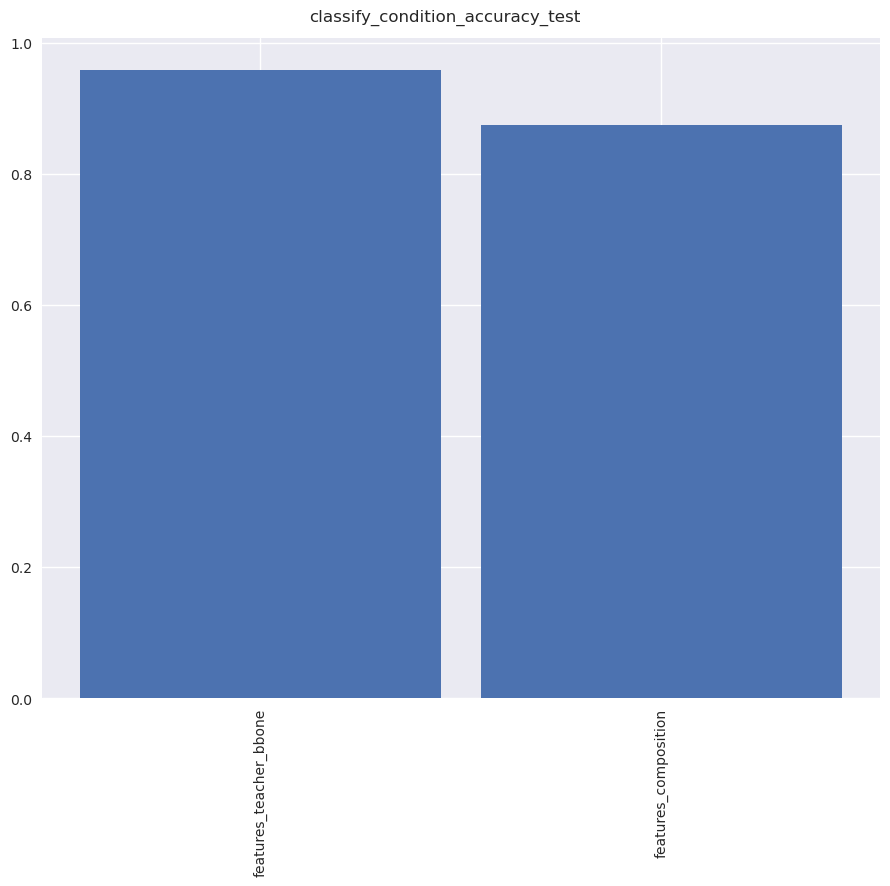

In [34]:
figs[2]

# Transfer annotation to the sp_img._image_properties dict

In [35]:
from tissue_purifier.misc_utils.misc import transfer_annotations_between_dict
     
annotation_keys = []
for key in embeddings_dict.keys():
    if key.startswith("pca") or key.startswith("umap") or key.startswith("leiden") or key.startswith("spatial_score"):
        annotation_keys.append(key)
print(annotation_keys)
    
for sp_img in sp_images:    
    transfer_annotations_between_dict(
        source_dict=embeddings_dict,
        dest_dict=sp_img.patch_properties_dict,
        annotation_keys=annotation_keys,
        anchor_key="features_student_bbone",
    )

inspect_dict(sp_images[0].patch_properties_dict)

['spatial_score', 'pca_features_teacher_bbone', 'umap_features_teacher_bbone', 'leiden_res_0.01_features_teacher_bbone', 'leiden_res_0.1_features_teacher_bbone', 'leiden_res_0.3_features_teacher_bbone', 'leiden_res_0.5_features_teacher_bbone', 'leiden_res_1.0_features_teacher_bbone', 'pca_features_composition', 'umap_features_composition', 'leiden_res_0.01_features_composition', 'leiden_res_0.1_features_composition', 'leiden_res_0.3_features_composition', 'leiden_res_0.5_features_composition', 'leiden_res_1.0_features_composition']
features_student_bbone <class 'torch.Tensor'> torch.Size([500, 128]) cpu
features_teacher_bbone <class 'torch.Tensor'> torch.Size([500, 128]) cpu
features_student_head <class 'torch.Tensor'> torch.Size([500, 128]) cpu
features_teacher_head <class 'torch.Tensor'> torch.Size([500, 128]) cpu
features_composition <class 'torch.Tensor'> torch.Size([500, 9]) cpu
patch_xywh <class 'torch.Tensor'> torch.Size([500, 4]) cpu
spatial_score <class 'torch.Tensor'> torch.S

In [ ]:
_spot_properties_dict

# 3. Transfer the annotations to the sparse_images.patch_properties_dict

In [ ]:
from tissue_purifier.misc_utils.dict_util import transfer_annotations_between_dict
    
anchor_key = 'patch_xywh'
annotation_keys = list(all_features_dict.keys())
annotation_keys.remove('patch_xywh')
    
for sp_img in sp_images:    
    transfer_annotations_between_dict(
        source_dict=all_features_dict,
        dest_dict=sp_img.patch_properties_dict,
        annotation_keys=annotation_keys,
        anchor_key=anchor_key,
    )

#inspect_dict(sp_images[0].patch_properties_dict)

### 2. From path property to image property

In [ ]:
annotation_keys = list(sp_images[0].patch_properties_dict.keys())
annotation_keys.remove('classify_condition')
annotation_keys.remove('classify_tissue_label')
annotation_keys.remove('patch_xywh')
print(annotation_keys)

for sp_img in sp_images:
    sp_img.path_property_to_image_property(
        keys=annotation_keys,
        overwrite=True,
        verbose=False)

#inspect_dict(image_dict)

### 3. Visualize the Image Properties

In [ ]:
from tissue_purifier.plot_utils.plot_images import show_raw_all_channels, show_raw_one_channel

Plot the cell composition

In [ ]:
cell_names = list(cell_to_code_dict.keys())

for sp_img, f_name in zip(sp_images, f_names):
    fig = show_raw_one_channel(sp_img.image_properties_dict["feature_composition"], n_col=3, in_range=(0.0, 1.0),
                    titles=list(cell_to_code_dict.keys()), sup_title="Cell Composition of {0}".format(f_name), cmap="magma")
    exp["masks/cell_composition"].log(neptune.types.File.as_image(fig))
#fig 

In [ ]:
for cell_type, code in cell_to_code_dict.items():
    # print(cell_type, code)
    fig = show_raw_one_channel([sp_img.image_properties_dict["feature_composition"][code] for sp_img in sp_images], n_col=3, 
                               in_range=(0.0, 1.0),
                               titles=f_names, sup_title="Cell Composition of {0}".format(cell_type), cmap="magma")
    exp["masks/cell_composition"].log(neptune.types.File.as_image(fig))

#fig

Plot the moran score

In [ ]:
fig = show_raw_one_channel([sp_img.image_properties_dict["regress_moran"][0] for sp_img in sp_images], n_col=3, 
                            scale_each=False, in_range='image', 
                            titles=f_names, sup_title="Moran score", cmap="magma")
exp["masks/moran"].log(neptune.types.File.as_image(fig))
#fig

Plot the Lieden cluster

In [ ]:
image_keys = sp_images[0].image_properties_dict.keys()
for key in image_keys:
    if key.startswith("leiden"):
        print(key)
        fig = show_raw_all_channels([sp_img.image_properties_dict[key] for sp_img in sp_images], n_col=3, titles=f_names, sup_title=key, cmap=plt.cm.tab10, show_colorbar=False)
        exp["masks/leiden/all_chs"].log(neptune.types.File.as_image(fig))
#fig

In [ ]:
image_keys = sp_images[0].image_properties_dict.keys()
for key in image_keys:
    if key.startswith("leiden"):
        for sp_img, f_name in zip(sp_images, f_names):
            n_clusters = sp_img.image_properties_dict[key].shape[-3]
            titles = ["leiden cluster: "+str(n) for n in range(n_clusters)]
            fig = show_raw_one_channel(sp_img.image_properties_dict[key], sup_title="{0} by {1}".format(f_name,key),
                                      titles=titles)
            exp["masks/leiden/"+key].log(neptune.types.File.as_image(fig))
# fig

Plot the PCA components

In [ ]:
for key in image_keys:
    if key.startswith("pca"):
        print(key)
        fig = show_raw_one_channel([sp_img.image_properties_dict[key][0] for sp_img in sp_images], n_col=3, titles=f_names, sup_title="PCA1 by "+key, cmap="seismic")
        exp["masks/pca"].log(neptune.types.File.as_image(fig))
        fig = show_raw_one_channel([sp_img.image_properties_dict[key][1] for sp_img in sp_images], n_col=3, titles=f_names, sup_title="PCA2 by "+key, cmap="seismic")
        exp["masks/pca"].log(neptune.types.File.as_image(fig))
# fig

Plot the UMAP components

In [ ]:
for key in image_keys:
    if key.startswith("umap"):
        print(key)
        fig = show_raw_one_channel([sp_img.image_properties_dict[key][0] for sp_img in sp_images], n_col=3, titles=f_names, sup_title="UMAP1 by "+key, cmap="seismic")
        exp["masks/umap"].log(neptune.types.File.as_image(fig))
        fig = show_raw_one_channel([sp_img.image_properties_dict[key][1] for sp_img in sp_images], n_col=3, titles=f_names, sup_title="UMAP2 by "+key, cmap="seismic")
        exp["masks/umap"].log(neptune.types.File.as_image(fig))
        
# fig

### 4. Transfer annotation on spot

In [ ]:
# inspect_dict(sp_images[0].image_properties_dict)

keys_image = list(sp_images[0].image_properties_dict.keys())
keys_image.remove("umap_feature_composition")
keys_image.remove("pca_feature_composition")
keys_image.remove("moran_I")

for sp_img in sp_images:
    sp_img.image_property_to_spot_property(
        keys=keys_image,
        overwrite=True)
    
# inspect_dict(sp_images[0].spot_properties_dict)

# Usage statistics of clusters

In [ ]:

TODO

In [ ]:
from tissue_purifier.plot_utils.plot_misc import plot_counters
from tissue_purifier.misc_utils.misc import channel_counter_in_window

In [ ]:
for key in image_keys:
    if key.startswith("leiden"):
        print(key)
        leiden_counters = [channel_counter_in_window(sp_img.image_properties_dict[key]) for sp_img in sp_images]
        fig = plot_counters(leiden_counters, dataset_labels=f_names, title="normalized utilization of clusters by {0}".format(key))
        exp["usage"].log(neptune.types.File.as_image(fig))

In [ ]:
cell_types = list(sp_images[0]._categories_to_codes.keys())

cell_counters = [channel_counter_in_window(sp_img) for sp_img in sp_images]
fig = plot_counters(cell_counters, dataset_labels=f_names, title="normalized utilization of cells", x_labels=cell_types)
exp["usage"].log(neptune.types.File.as_image(fig))

# Now you can do DE

In [ ]:
TO DO

In [ ]:
gather all spot dict from the sparse images.... do DE...

In [ ]:
exp.stop()

In [ ]:
%matplotlib inline
import torch
import numpy
import matplotlib.pyplot as plt
from tissue_purifier.data_utils.datamodule import SlideSeqKidneyDM, SlideSeqTestisDM
from tissue_purifier.plot_utils.plot_images import show_raw_all_channels, show_raw_one_channel
from tissue_purifier.plot_utils.plot_misc import plot_composition